In [1]:
import torch
from torch import nn
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
from dataset_prep import SetsToy,SetsMNIST, SetsOmniglot
from AttentionNetwork import ImageAttentionNetwork
from DeepSetNetwork import ImageDeepSetNetwork
from LSTMNetwork import ImageLSTMNetwork
import utils

In [3]:
def visualize(i, aNetwork, data, masks, outs):
    d = data[i].unsqueeze(dim=0)
    m = masks[i].unsqueeze(dim=0)
    o = outs[i]
    max_size = d.shape[1]
    
    _,axes = plt.subplots(1,max_size,figsize=(20,4))
    axs = axes.flatten()
    for i in range(max_size):
        if m[0,i] == 1:
            plt.sca(axs[i])
            plt.imshow(d[0,i,0,:,:].numpy(),cmap='gray')
        else:
            axs[i].remove()
    plt.show()
    print('Actual Answer: %d'%o.item())    
    print('Predicted Answer: %1.1f'%aNetwork(d,m).item())

# LSTM

In [4]:
# Load data
dataset = SetsMNIST(max_size=10)
train_sets, train_labels, test_sets, test_labels = dataset.sum_task()
data, masks, outs = utils.process_dataset(train_sets, train_labels, max_size=dataset.upper_bound-1, source="MNIST")

C:\Users\Matt\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\Matt\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 1: loss = 6.649e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 2: loss = 4.902e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 3: loss = 3.887e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 4: loss = 3.216e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 5: loss = 2.727e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 6: loss = 2.365e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 7: loss = 2.098e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 8: loss = 1.905e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 9: loss = 1.766e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 10: loss = 1.663e+02


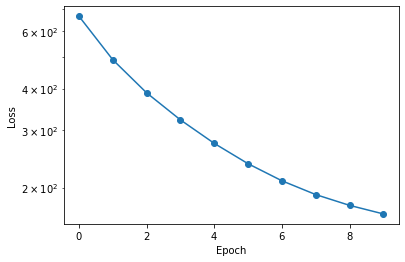

In [5]:
# Train deep set network
network = ImageLSTMNetwork(entity_size=data[0].shape[1:])
optim = torch.optim.Adam(network.parameters(), lr=1e-3, weight_decay=1e-6)
elosses = []

batch_size = 200
epochs = 10

for epoch in range(epochs):
    bd, bm, bo = utils.batch_data(data,masks,outs,bs=batch_size)
    losses = []
    for i in tqdm(range(len(bd))):
        optim.zero_grad()
        loss = network.compute_loss(bd[i],bm[i],bo[i])
        loss.backward()
        optim.step()

        losses.append(loss.item())
    print('Epoch %d: loss = %1.3e'%(epoch+1,np.mean(losses)))
    elosses.append(np.mean(losses))

plt.figure()
plt.semilogy(elosses,'o-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

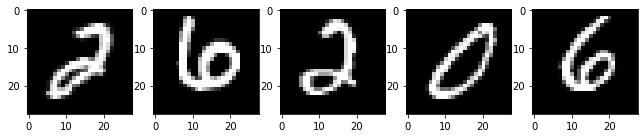

Actual Answer: 16
Predicted Answer: 19.5


In [6]:
visualize(100, network, data, masks, outs)

In [7]:
# Load data
dataset = SetsOmniglot(max_size=60)
train_sets, train_labels, test_sets, test_labels = dataset.unique_task()
data, masks, outs = utils.process_dataset(train_sets, train_labels, max_size=dataset.upper_bound-1, source="OMNI")

Files already downloaded and verified
Files already downloaded and verified


In [8]:
# Train deep set network
network = ImageLSTMNetwork(entity_size=data[0].shape[1:])
optim = torch.optim.Adam(network.parameters(), lr=1e-3, weight_decay=1e-6)
elosses = []

batch_size = 200
epochs = 10

for epoch in range(epochs):
    bd, bm, bo = utils.batch_data(data,masks,outs,bs=batch_size)
    losses = []
    for i in tqdm(range(len(bd))):
        optim.zero_grad()
        loss = network.compute_loss(bd[i],bm[i],bo[i])
        loss.backward()
        optim.step()

        losses.append(loss.item())
    print('Epoch %d: loss = %1.3e'%(epoch+1,np.mean(losses)))
    elosses.append(np.mean(losses))

plt.figure()
plt.semilogy(elosses,'o-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1: loss = 1.617e+03


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2: loss = 1.598e+03


  0%|          | 0/3 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
visualize(100, network, data, masks, outs)

# Deep Sets

In [7]:
# Load data
dataset = SetsMNIST(max_size=10)
train_sets, train_labels, test_sets, test_labels = dataset.sum_task()
data, masks, outs = utils.process_dataset(train_sets, train_labels, max_size=dataset.upper_bound-1, source="MNIST")

  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 1: loss = 6.016e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 2: loss = 4.775e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 3: loss = 4.027e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 4: loss = 3.432e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 5: loss = 2.959e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 6: loss = 2.585e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 7: loss = 2.295e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 8: loss = 2.072e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 9: loss = 1.905e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 10: loss = 1.782e+02


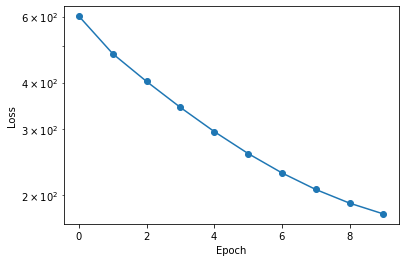

In [8]:
# Train deep set network
network = ImageDeepSetNetwork(entity_size=data[0].shape[1:])
optim = torch.optim.Adam(network.parameters(), lr=1e-3, weight_decay=1e-6)
elosses = []

batch_size = 200
epochs = 10

for epoch in range(epochs):
    bd, bm, bo = utils.batch_data(data,masks,outs,bs=batch_size)
    losses = []
    for i in tqdm(range(len(bd))):
        optim.zero_grad()
        loss = network.compute_loss(bd[i],bm[i],bo[i])
        loss.backward()
        optim.step()

        losses.append(loss.item())
    print('Epoch %d: loss = %1.3e'%(epoch+1,np.mean(losses)))
    elosses.append(np.mean(losses))

plt.figure()
plt.semilogy(elosses,'o-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

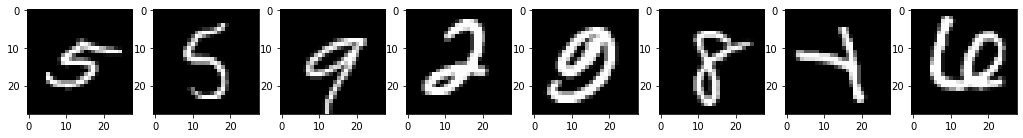

Actual Answer: 48
Predicted Answer: 19.7


In [9]:
visualize(100, network, data, masks, outs)

# Self-Attention

In [10]:
# Load data
dataset = SetsMNIST(max_size=10)
train_sets, train_labels, test_sets, test_labels = dataset.sum_task()
data, masks, outs = utils.process_dataset(train_sets, train_labels, max_size=dataset.upper_bound-1, source="MNIST")

  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 1: loss = 6.574e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 2: loss = 5.165e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 3: loss = 4.229e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 4: loss = 3.497e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 5: loss = 2.977e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 6: loss = 2.556e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 7: loss = 2.279e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 8: loss = 2.055e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 9: loss = 1.876e+02


  0%|          | 0/55 [00:00<?, ?it/s]

Epoch 10: loss = 1.749e+02


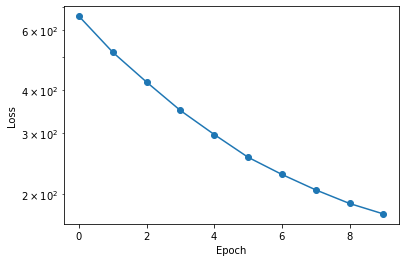

In [11]:
# Train deep set network
network = ImageAttentionNetwork(entity_size=data[0].shape[1:])
optim = torch.optim.Adam(network.parameters(), lr=1e-3, weight_decay=1e-6)
elosses = []

batch_size = 200
epochs = 10

for epoch in range(epochs):
    bd, bm, bo = utils.batch_data(data,masks,outs,bs=batch_size)
    losses = []
    for i in tqdm(range(len(bd))):
        optim.zero_grad()
        loss = network.compute_loss(bd[i],bm[i],bo[i])
        loss.backward()
        optim.step()

        losses.append(loss.item())
    print('Epoch %d: loss = %1.3e'%(epoch+1,np.mean(losses)))
    elosses.append(np.mean(losses))

plt.figure()
plt.semilogy(elosses,'o-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

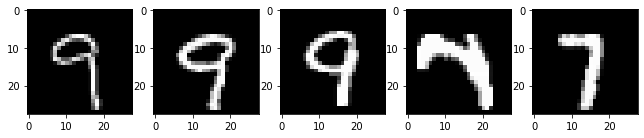

Actual Answer: 41
Predicted Answer: 20.2


In [12]:
visualize(100, network, data, masks, outs)